In [1]:
from fastai2.vision.all import *
from animal_sounds import *

In [2]:
source = sounds_source()

In [3]:
class ShowableTensor(ShowTitle, TensorBase): pass

In [4]:
dblock = DataBlock((ImageBlock(PILImageBW), RegressionBlock(1)), get_items=get_files,
                   get_x=get_spec, get_y=[get_duration, lambda x: ShowableTensor(x)],
                   batch_tfms=[Normalize()])

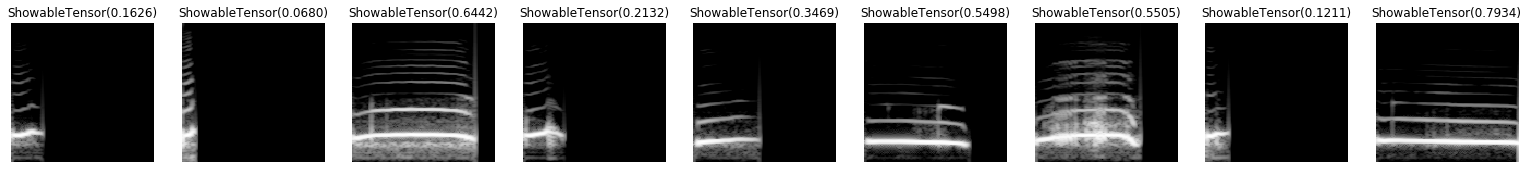

In [5]:
dls = dblock.dataloaders(source, bs=64)
dls.show_batch(nrows=1)

In [6]:
arch = lambda pretrained: xresnet18(pretrained, c_in=1)
learn = cnn_learner(dls, arch, loss_func=L1LossFlat(), pretrained=False)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=2.2908675418875646e-06)

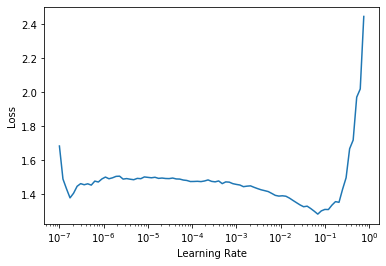

In [7]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(8, 3e-2)

epoch,train_loss,valid_loss,time
0,0.088513,0.110732,00:13
1,0.127612,1.321362,00:13
2,0.108365,0.166236,00:13
3,0.074956,1.558015,00:13
4,0.064863,0.234327,00:13
5,0.051463,0.083983,00:13
6,0.043144,0.627460,00:13
7,0.037061,0.029453,00:13


In [12]:
learn.save_encoder('rawenc-dur')

In [13]:
learn.fit_one_cycle(10, slice(1e-5,1e-3))

epoch,train_loss,valid_loss,time
0,0.071798,0.017809,00:13
1,0.076308,0.043115,00:13
2,0.082544,0.067001,00:13
3,0.075827,0.061658,00:13
4,0.062736,0.027963,00:13
5,0.069402,0.075584,00:13
6,0.057053,0.052785,00:13
7,0.053707,0.028886,00:13
8,0.048915,0.033215,00:13
9,0.049782,0.020262,00:13


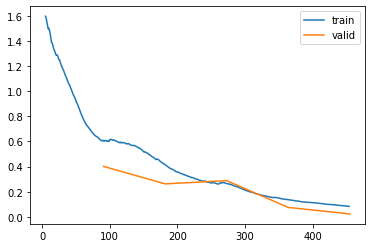

In [9]:
learn.recorder.plot_loss()

In [28]:
learn.save_encoder('duration-encoder')

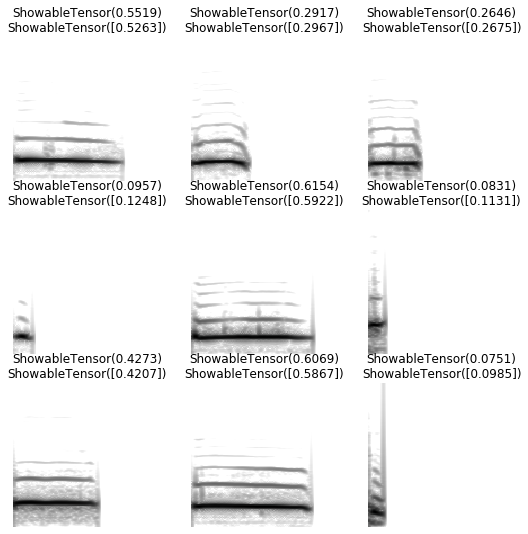

In [15]:
learn.show_results()